In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm 

In [3]:
def plot_beta(alpha, beta, ax, title=None, label=None, xticks=[0.0, 0.5, 1.0]):

    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 10001)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, np.max(y)*1.2)

def get_beta_dist_params(dist_samples):
    dist_samples = np.array(dist_samples)
    num_conversions = dist_samples.sum()
    total_visitors = len(dist_samples)
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    mean = 1 * num_conversions / total_visitors
    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_dist(website_samples, ax, label=None, xlim=(0,1)):
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params(website_samples)
    title = None if label else r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax, title, label, [0.0, mean, 1.0])
    ax.set_xlabel("Win Rate")
    ax.set_ylabel("Probability Density")
    ax.set_xlim(xlim)
    
def get_samples(df, columns, param1, param2, scale=0):
    new_df = df[columns]
    a = new_df[new_df[param1] > new_df[param2] + scale]
    return a[columns[0]]

def cleaning_df(df,col1,col2,scale1,scale2):
    new_df = df[df[col1] > scale1].copy()
    new_df2 = new_df[new_df[col1] < scale1*3].copy()
    return_df = new_df2[new_df2[col2] > scale2].copy()
    return return_df

In [4]:
chall_df_clean = cleaning_df(pd.read_csv('Data/Challenger_Ranked_Games.csv'), 'gameDuraton', 'blueWardPlaced', 600, 0)

In [5]:
# chall_df = pd.read_csv('Data/Challenger_Ranked_Games.csv')
# gm_df = pd.read_csv('Data/GrandMaster_Ranked_Games.csv')
# m_df = pd.read_csv('Data/Master_Ranked_Games.csv')
# chall_df_clean = chall_df[chall_df['gameDuraton'] > 600].copy()
# chall_df_clean = chall_df_clean[chall_df_clean['gameDuraton'] < 1800].copy()
# gm_df_clean = gm_df[gm_df['gameDuraton'] > 600].copy()
# gm_df_clean = gm_df_clean[gm_df_clean['gameDuraton'] < 1800].copy()
# m_df_clean = m_df[m_df['gameDuraton'] > 600].copy()
# m_df_clean = m_df_clean[m_df_clean['gameDuraton'] < 1800].copy()
# chall_df_clean['blueVisionScore'] = chall_df_clean['blueWardPlaced'] + chall_df_clean['blueWardkills']
# chall_df_clean['redVisionScore'] = chall_df_clean['redWardPlaced'] + chall_df_clean['redWardkills']

In [6]:
chall_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19139 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   19139 non-null  int64  
 1   gameDuraton              19139 non-null  int64  
 2   blueWins                 19139 non-null  int64  
 3   blueFirstBlood           19139 non-null  int64  
 4   blueFirstTower           19139 non-null  int64  
 5   blueFirstBaron           19139 non-null  int64  
 6   blueFirstDragon          19139 non-null  int64  
 7   blueFirstInhibitor       19139 non-null  int64  
 8   blueDragonKills          19139 non-null  int64  
 9   blueBaronKills           19139 non-null  int64  
 10  blueTowerKills           19139 non-null  int64  
 11  blueInhibitorKills       19139 non-null  int64  
 12  blueWardPlaced           19139 non-null  int64  
 13  blueWardkills            19139 non-null  int64  
 14  blueKills             

In [7]:
correlation_df = chall_df_clean.corr()

In [8]:
correlation_df[['blueTotalGold','blueWardPlaced', 'blueKills', 'blueTotalHeal','blueObjectDamageDealt']]

,blueTotalGold,blueWardPlaced,blueKills,blueTotalHeal,blueObjectDamageDealt
gameId,-0.058007,-0.060028,-0.064219,7.590586e-07,-0.007220
gameDuraton,0.700810,0.840431,0.340929,6.266340e-01,0.488702
blueWins,0.394647,0.088517,0.588140,3.001513e-01,0.681803
blueFirstBlood,0.113897,0.016350,0.187679,4.860368e-02,0.190639
blueFirstTower,0.275559,0.073842,0.371301,1.605644e-01,0.487683
blueFirstBaron,0.529927,0.397363,0.431851,4.387304e-01,0.660071
blueFirstDragon,0.160838,0.035026,0.244017,1.300003e-01,0.336763
blueFirstInhibitor,0.490467,0.211073,0.546735,3.856317e-01,0.690650
blueDragonKills,0.532102,0.338182,0.540572,4.558913e-01,0.755748
blueBaronKills,0.544857,0.402188,0.439741,4.485710e-01,0.669695


In [9]:
columns = ['blueKillingSpree', 'blueAssist', 'blueFirstBaron','blueKills']
x = sm.tools.tools.add_constant(chall_df_clean[columns].values)
y = chall_df_clean['blueTotalGold']
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 1.468e+04
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:12:13   Log-Likelihood:            -1.9355e+05
No. Observations:               19139   AIC:                         3.871e+05
Df Residuals:                   19134   BIC:                         3.872e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.435e+04     93.985    259.034      0.0

In [10]:
print(20924 * .8) 
print(20924 * .2)

16739.2
4184.8


In [11]:
from sklearn.model_selection import train_test_split

x = chall_df_clean[['blueWardPlaced','blueKills','blueTotalHeal','blueObjectDamageDealt']]
y = chall_df_clean['blueTotalGold']

xtrain, xtest, yTrain, yTest = train_test_split(x,y,test_size=0.2, random_state=27)

In [12]:
columns = ['blueWardPlaced', 'blueKills', 'blueTotalHeal', 'blueObjectDamageDealt']
xTrain = sm.tools.tools.add_constant(xtrain.values)
# y = train_df['blueTotalGold']
model = sm.OLS(yTrain,xTrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 2.760e+04
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:12:13   Log-Likelihood:            -1.4950e+05
No. Observations:               15311   AIC:                         2.990e+05
Df Residuals:                   15306   BIC:                         2.990e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.387e+04    107.164    129.430      0.0

In [13]:
xTest = sm.tools.tools.add_constant(xtest.values)
# ytest = predict_df['blueTotalGold']

yhat = results.predict(xTest)
prediction = list(map(round,yhat))

Actual = np.array(list(yTest.values))
print(prediction[0:10])
print(Actual[0:10])
result_df = pd.DataFrame()
result_df['actual'] = Actual
result_df['predicted'] = prediction
print(len(result_df[(result_df['actual'] + 5000 > result_df['predicted']) & (result_df['actual'] - 5000 < result_df['predicted'])]))
print(f"Model accuracy rate within 5000 total gold on test data: {3186/4184:2.2f}%")

[26559.0, 65254.0, 44462.0, 39673.0, 55522.0, 42578.0, 49045.0, 58132.0, 36397.0, 29973.0]
[24156 78540 50891 33689 51550 38935 45670 63670 39786 29043]
3186
Model accuracy rate within 5000 total gold on test data: 0.76%


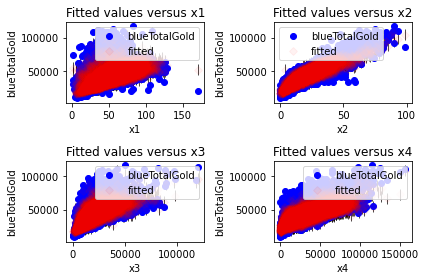

In [14]:
fig,axs = plt.subplots(2,2)
for idx,ax in enumerate(axs.flatten()):
    fig = sm.graphics.plot_fit(results, idx+1 , ax=ax, alpha=0.05)
plt.tight_layout();

In [15]:
# columns = ['blueWardPlaced','blueKills', 'blueTotalHeal', 'blueObjectDamageDealt']
x = chall_df_clean[['blueWardPlaced','blueKills','blueTotalHeal','blueObjectDamageDealt']]
y = chall_df_clean['blueWins']

xtrain, xtest, yTrain, yTest = train_test_split(x,y,test_size=0.2, random_state=27)

xTrain = sm.tools.tools.add_constant(xtrain.values) 
# yTrain = train_df[['blueWins']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(yTrain, xTrain).fit() 

Optimization terminated successfully.
         Current function value: 0.280394
         Iterations 8


In [16]:
print(log_reg.summary())

xTest = sm.tools.tools.add_constant(xtest.values)
# ytest = predict_df['blueWins']

yhat = log_reg.predict(xTest)
prediction = list(map(round,yhat))

Actual = np.array(list(yTest.values))
print(len(np.where(Actual == prediction)[0]))
print(f"Model accuracy rate for wins on test data: {3684/4184:2.2f}%")

                           Logit Regression Results                           
Dep. Variable:               blueWins   No. Observations:                15311
Model:                          Logit   Df Residuals:                    15306
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Oct 2020   Pseudo R-squ.:                  0.5955
Time:                        18:12:14   Log-Likelihood:                -4293.1
converged:                       True   LL-Null:                       -10613.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2288      0.089    -25.091      0.000      -2.403      -2.055
x1            -0.0740      0.002    -36.232      0.000      -0.078      -0.070
x2             0.1107      0.004     26.353      0.0

In [17]:
from sklearn.metrics import *
# precision, *accuracy*, recall
print(accuracy_score(Actual,prediction))
print(average_precision_score(Actual,prediction))
print(precision_score(Actual,prediction))
print(recall_score(Actual,prediction))
print(roc_auc_score(Actual,prediction))

0.8991640543364682
0.8607054666984717
0.8982617586912065
0.9038065843621399
0.8990901286991166


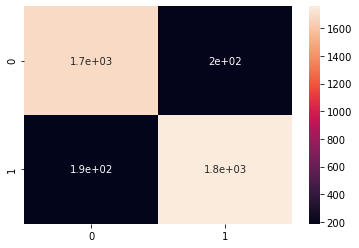

In [18]:
cf_matrix = confusion_matrix(Actual, prediction)
sns.heatmap(cf_matrix, annot=True)
plt.savefig('images/heat_map.png');

In [19]:
cf_matrix

array([[1685,  199],
       [ 187, 1757]])

In [16]:
p_value = stats.mannwhitneyu(vision_df_blue_wins[['blueWardPlaced']],vision_df_blue_wins[['redWardPlaced']], alternative="greater")

In [17]:
p_value

MannwhitneyuResult(statistic=1483605127.5, pvalue=5.001379862078499e-54)

In [18]:
from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from glm.glm import GLM
from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [22]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               blueWins   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          2.484e+05
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:47:11   Log-Likelihood:                         -3355.6
No. Observations:               53041   AIC:                                      6717.
Df Residuals:                   53038   BIC:                                      6744.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [23]:
y_predict = results.predict(x)
y_predict

0        0.964464
1        0.622236
2        0.635041
3        1.086155
4        0.924009
           ...   
53036    1.317018
53037    1.138370
53038    0.996554
53039    1.418470
53040    0.758077
Length: 53041, dtype: float64

In [24]:
residuals = y_predict - y

In [25]:
residuals

0       -0.035536
1       -0.377764
2       -0.364959
3        0.086155
4       -0.075991
           ...   
53036    0.317018
53037    0.138370
53038   -0.003446
53039    0.418470
53040   -0.241923
Length: 53041, dtype: float64

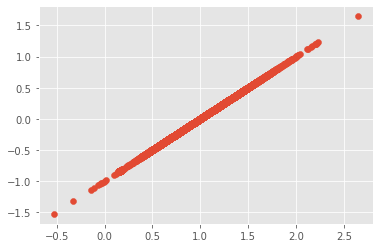

In [26]:
plt.scatter(y_predict,residuals);

NormaltestResult(statistic=989.4204615306272, pvalue=1.412786829287968e-215)


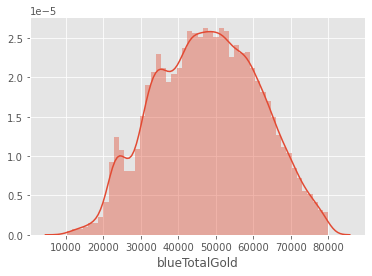

In [52]:
print(stats.normaltest(new_df['blueTotalGold']))
sns.distplot(new_df['blueTotalGold']);

In [53]:
columns = ['blueTotalGold','blueVisionScore','blueKills']
chall_df_clean['logblueTotalGold'] = chall_df_clean['blueTotalGold'].apply((lambda row: np.log(
            row) if row != 0 else 0))
# chall_df_clean.mean()
drop_vision_df = chall_df_clean[chall_df_clean['blueVisionScore'] > 0]
# sns.pairplot(drop_vision_df[0:26])

In [114]:
new_df['blueVisionScore'] = new_df['blueWardPlaced'] + new_df['blueWardkills']
columns = ['blueWardPlaced','blueKills']
x = sm.tools.tools.add_constant(new_df[columns].values)
y = new_df['blueTotalGold']
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 7.354e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:34   Log-Likelihood:            -2.6018e+05
No. Observations:               26014   AIC:                         5.204e+05
Df Residuals:                   26011   BIC:                         5.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.438e+04     94.630    151.996      0.0

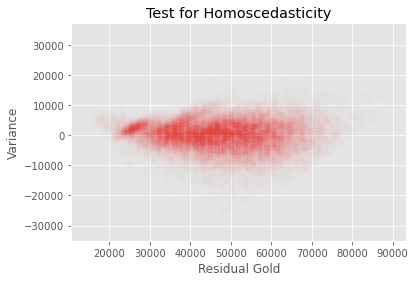

In [115]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
fig,ax = plt.subplots(1,1)
ax.scatter(y_predict,residuals, alpha=0.005)
plt.title("Test for Homoscedasticity")
ax.set_xlabel("Residual Gold")
ax.set_ylabel("Variance");

In [116]:
ax.scatter(y_predict,y,alpha=0.01);

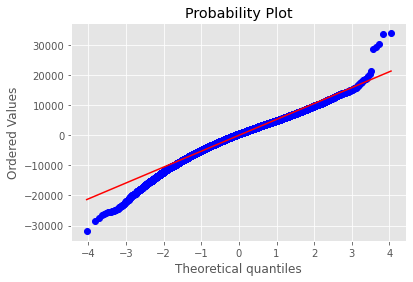

In [117]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [131]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")

columns = ['blueWardsPlaced','blueKills']

xtest = sm.tools.tools.add_constant(df[columns].values)
ytest = df['blueTotalGold']

yhat = results.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))
print(prediction[0:50])
print(Actual[0:50])

[28253.0, 21320.0, 23706.0, 27152.0, 35806.0, 22617.0, 24354.0, 22185.0, 23922.0, 20668.0, 22181.0, 31071.0, 24354.0, 20884.0, 21100.0, 20664.0, 26096.0, 26284.0, 23266.0, 21104.0, 26964.0, 20668.0, 21532.0, 34717.0, 26728.0, 21532.0, 25223.0, 24570.0, 44028.0, 20880.0, 26956.0, 22401.0, 22189.0, 21969.0, 28241.0, 22177.0, 18714.0, 23049.0, 22841.0, 20880.0, 23910.0, 30851.0, 26092.0, 21320.0, 20880.0, 24114.0, 26964.0, 25439.0, 19363.0, 22185.0]
[17210 14712 16113 15157 16400 15899 16874 15305 16401 15057 15474 16695
 17865 14979 15722 15015 19733 14852 16282 14994 18606 15878 15773 15906
 16515 15415 17178 17226 17474 14905 18132 16053 16438 15634 16085 14981
 15421 15665 17528 15032 15483 19226 16945 15000 15888 12925 19250 18355
 13978 15851]


In [126]:
correct = np.array(np.where(Actual==prediction)[0])
correct

array([], dtype=int64)

NormaltestResult(statistic=1934.7130533446245, pvalue=0.0)


(array([1.3000e+01, 1.0200e+02, 4.6300e+02, 2.6330e+03, 9.8070e+03,
        1.0953e+04, 1.9230e+03, 1.1100e+02, 5.0000e+00, 4.0000e+00]),
 array([-28916.84851044, -23052.176779  , -17187.50504756, -11322.83331612,
         -5458.16158469,    406.51014675,   6271.18187819,  12135.85360963,
         18000.52534107,  23865.19707251,  29729.86880395]),
 <a list of 10 Patch objects>)

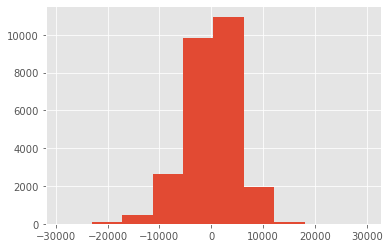

In [112]:
print(stats.normaltest(residuals))
plt.hist(residuals)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [60]:
x = new_df[columns]

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

p_values = pd.DataFrame(results.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
  
vif_data.head()

,feature,VIF,p_values
0,blueWardPlaced,7.041618,0.000000e+00
1,blueKills,5.426002,0.000000e+00
2,blueTotalHeal,8.031622,0.000000e+00
3,blueObjectDamageDealt,7.095036,2.269616e-18


In [156]:
columns = ['blueWardPlaced','blueKills']

Xtrain = new_df[columns] 
ytrain = new_df[['blueWins']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.619190
         Iterations 6


In [157]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                26014
Model:                          Logit   Df Residuals:                    26012
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.1067
Time:                        13:21:11   Log-Likelihood:                -16108.
converged:                       True   LL-Null:                       -18031.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
blueWardPlaced    -0.0207      0.000    -45.806      0.000      -0.022      -0.020
blueKills          0.0644      0.001     51.285      0.000       0.062       0.067
==================================================================================
"""

In [159]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")

columns = ['blueWardsPlaced','blueKills']

xtest = df[columns]
ytest = df['blueWins']

yhat = log_reg.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))

In [160]:
correct = np.array(np.where(Actual==prediction)[0])
len(correct)

5956

In [161]:

from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(ytest, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(ytest, prediction))


Confusion Matrix : 
 [[2984 1965]
 [1958 2972]]
Test accuracy =  0.602895029861322



    1. Event A1. It rains on Marie's wedding.
    2. Event A2. It does not rain on Marie's wedding.
    3. Event B. The weatherman predicts rain.

In terms of probabilities, we know the following:

    1. P( A1 ) = 5/365 =0.0136985 [It rains 5 days out of the year.]
    2. P( A2 ) = 360/365 = 0.9863014 [It does not rain 360 days out of the year.]
    3. P( B | A1 ) = 0.9 [When it rains, the weatherman predicts rain 90% of the time.]
    4. P( B | A2 ) = 0.1 [When it does not rain, the weatherman predicts rain 10% of the time.]

We want to know P( A1 | B ), the probability it will rain on the day of Marie's wedding, given a forecast for rain by the weatherman. The answer can be determined from Bayes' theorem, as shown below.

1. P( A1 | B ) =   	P( A1 ) P( B | A1 ) P( A1 ) P( B | A1 ) + P( A2 ) P( B | A2 )

2. P( A1 | B ) = 	(0.014)(0.9) [ (0.014)(0.9) + (0.986)(0.1) ]

3. P( A1 | B ) = 	0.111

Note the somewhat unintuitive result. Even when the weatherman predicts rain, it rains only about 11% of the time. Despite the weatherman's gloomy prediction, there is a good chance that Marie will not get rained on at her wedding. 

In [61]:
blue_gold_greater = chall_df[chall_df['blueTotalGold'] > chall_df['redTotalGold']]

In [62]:
blue_wins = chall_df[chall_df['blueWins'] > 0]
len(blue_wins['blueWins'])

13454

In [63]:
print(len(blue_wins[blue_wins['blueTotalGold'] > blue_wins['redTotalGold']]))
print(26904 - 13152)
print(13152 / 26904)
print(13152/13454)
print(13454 - 13152)
print( (0.489*0.978) / ((0.489 * 0.978) + (0.511 * 0.022) ) )
print(0.95746199999999/0.957923999999)

13152
13752
0.4888492417484389
0.9775531440463803
302
0.9770329571548815
0.9995177070425102


## So, I want to see if I can make this form of test work for my data.\

1. Event A1: Blue wins the match.
2. Event A2: Blue does not win the match.
3. Event B: Blue has more gold than red.

1. P(A1): (based on sample) 13152/26904 = 0.489
2. P(A2): (based on sample) 13752/26904 = 0.511
3. P(B | A1): (based on sample) 13152/13454 =0.978
4. P(B | A2): (based on sample) 302/13454 = 0.022

So...

1. P(A1 | B): P(A1)P(B|A1) / P(A1)P(B|A1) + P(A2)P(B|A2)
2. P(A1 | B): (0.489)(0.978) / ((0.489)(0.978) + (0.511)(0.022))
3. P(A1 | B): 0.977

In [64]:
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b
 
# P(A)
p_a = 0.489
# P(B|A)
p_b_given_a = 0.978
# P(B|not A)
p_b_given_not_a = 0.022
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 97.703%


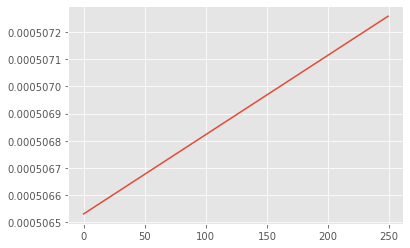

In [65]:
x = np.linspace(-3,3,num=250)
gold_dist = stats.norm(np.mean(chall_df_clean['blueTotalGold']), np.std(chall_df_clean['blueTotalGold']))
plt.plot(gold_dist.cdf(x));

In [66]:
bootstrap_sample_medians = []
for i in range(10000):
    bootstrap = np.random.choice(chall_df_clean['blueWardPlaced'], size=len(chall_df_clean['blueWardPlaced']), replace=True)
    bootstrap_median = np.median(bootstrap)
    bootstrap_sample_medians.append(bootstrap_median)
bootstrap_sample_medians

[59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,

In [67]:
bootstrap_sample_means = []
for i in range(10000):
    bootstrap = np.random.choice(chall_df_clean['blueTotalGold'], size=len(chall_df_clean['blueTotalGold']), replace=True)
    bootstrap_mean = np.mean(bootstrap)
    bootstrap_sample_means.append(bootstrap_mean)
bootstrap_sample_means

[48807.26944412997,
 48761.295520585685,
 48665.600022642364,
 48591.35220196989,
 48731.35812672176,
 48607.31389863769,
 48792.24283935243,
 48723.86505151138,
 48860.18291256274,
 48807.88675044342,
 48813.58568247858,
 48807.390769462996,
 48915.9740367561,
 48818.18487490094,
 48672.50677384052,
 48618.513943922415,
 48673.46903656742,
 48682.140948715045,
 48711.76825540586,
 48738.59877731235,
 48826.429261481564,
 48707.93297860296,
 48677.55307747462,
 48798.69074304691,
 48724.22740480773,
 48760.03766179856,
 48703.14566587418,
 48568.53560511718,
 48704.08509755085,
 48680.453828446356,
 48548.31937054228,
 48713.01237782558,
 48694.219781878564,
 48926.4832257821,
 48721.14808105966,
 48782.409789048645,
 48669.20823427299,
 48886.375070757385,
 48722.07502169893,
 48687.20219630929,
 48786.74470734745,
 48783.17706328541,
 48777.35197554625,
 48963.713536359865,
 48713.13079738858,
 48565.511075889655,
 48866.495037548586,
 48826.41469489415,
 48763.15200573607,
 48718.85

In [68]:
left_endpoint = np.percentile(bootstrap_sample_medians, 2.5)
right_endpoint = np.percentile(bootstrap_sample_medians, 97.5)

print("Sample 75'th Percentile: {:2.2f}".format(np.mean(chall_df_clean['blueWardPlaced'])))
print("Bootstrap Confidence Interval for Population 75'th Percentile: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Sample 75'th Percentile: 59.49
Bootstrap Confidence Interval for Population 75'th Percentile: [58.00, 59.00]


In [70]:
wins_and_gold = chall_df[['blueWins','blueTotalGold', 'redTotalGold']]

In [71]:
a = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold']]

In [72]:
a

,blueWins,blueTotalGold,redTotalGold
1,1,41072,37136
4,1,74955,74596
5,1,52221,44280
7,1,59163,47408
8,1,57940,49906
...,...,...,...
26893,0,69407,68038
26895,1,60024,54977
26898,1,51215,37657
26902,1,58160,52625


In [73]:
b = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 1000]

In [74]:
c = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 2000]
d = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 3000]

In [75]:
b

,blueWins,blueTotalGold,redTotalGold
1,1,41072,37136
5,1,52221,44280
7,1,59163,47408
8,1,57940,49906
9,1,39014,32064
...,...,...,...
26893,0,69407,68038
26895,1,60024,54977
26898,1,51215,37657
26902,1,58160,52625


In [76]:
a_samples = a['blueWins']
b_samples = b['blueWins']
c_samples = c['blueWins']
d_samples = d['blueWins']

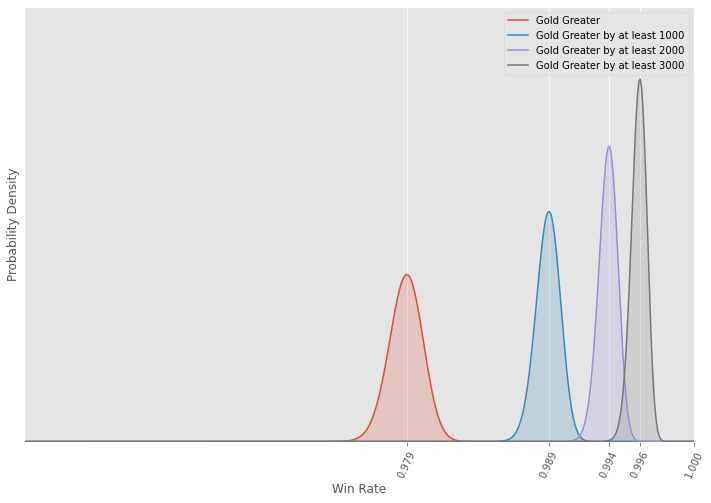

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot_beta_dist(a_samples, ax, label="Gold Greater", xlim=(0.95,1))
plot_beta_dist(b_samples, ax, label="Gold Greater by at least 1000", xlim=(0.95,1))
plot_beta_dist(c_samples, ax, label="Gold Greater by at least 2000", xlim=(0.95,1))
plot_beta_dist(d_samples, ax, label="Gold Greater by at least 3000", xlim=(0.95,1))
ax.legend()
ax.get_xaxis().set_ticks([0,np.mean(a_samples),np.mean(b_samples),np.mean(c_samples),np.mean(d_samples),1])
ax.tick_params(axis='x', rotation=65)
ax.set_xlim(0.95,1)

plt.savefig("gold_graph.png");

In [78]:
columns = ['blueWins','blueWardPlaced', 'redWardPlaced']
population = stats.norm(0.9, 0.6)
c_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 4)
d_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 6)
e_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 8)
f_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 10)
g_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 12)

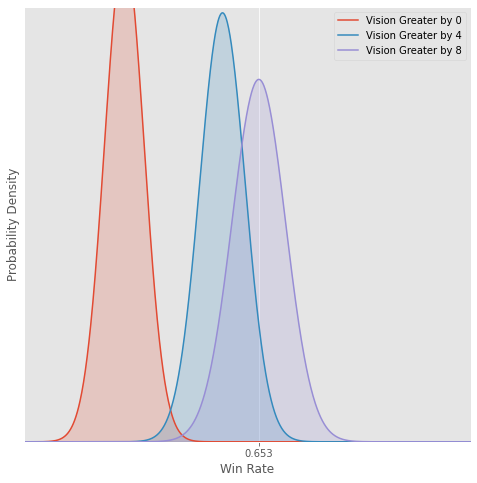

In [79]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
for i in range(0,9,4):
    a_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced',i)
    plot_beta_dist(a_vision_samples, ax, label=f"Vision Greater by {i}",xlim=(0.6,0.7))

ax.legend()

26904
26499


(array([3.500e+01, 8.900e+01, 1.750e+02, 8.630e+02, 9.000e+02, 1.219e+03,
        2.054e+03, 1.982e+03, 2.209e+03, 2.510e+03, 2.539e+03, 2.476e+03,
        2.280e+03, 2.087e+03, 1.678e+03, 1.220e+03, 8.260e+02, 4.970e+02,
        3.160e+02, 2.220e+02, 1.110e+02, 8.100e+01, 5.300e+01, 3.000e+01,
        1.700e+01, 1.200e+01, 1.000e+01, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([  8979. ,  12743.7,  16508.4,  20273.1,  24037.8,  27802.5,
         31567.2,  35331.9,  39096.6,  42861.3,  46626. ,  50390.7,
         54155.4,  57920.1,  61684.8,  65449.5,  69214.2,  72978.9,
         76743.6,  80508.3,  84273. ,  88037.7,  91802.4,  95567.1,
         99331.8, 103096.5, 106861.2, 110625.9, 114390.6, 118155.3,
        121920. ]),
 <a list of 30 Patch objects>)

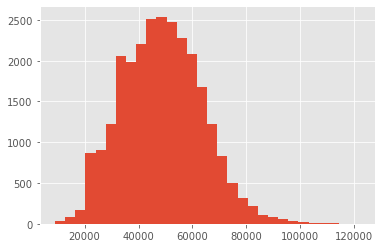

In [80]:
print(len(chall_df))
print(len(chall_df_clean))
plt.hist(chall_df_clean['blueTotalGold'], bins=30)

In [81]:
750/165

4.545454545454546

In [82]:
a_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced')
b_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 30)

In [83]:
num_simulations = 100_000

alpha, beta = get_beta_dist_params(a_vision_samples)[:2]
print(alpha, beta)
dist_A = stats.beta(alpha, beta)

alpha, beta = get_beta_dist_params(b_vision_samples)[:2]
print(alpha, beta)
dist_B = stats.beta(alpha, beta)

simulated_A = dist_A.rvs(num_simulations)
simulated_B = dist_B.rvs(num_simulations)

print((simulated_B > simulated_A).mean())

7431 4508
331 238
0.0268


In [84]:
stats.beta(331, 238).ppf([0.025, .975])

array([0.54097099, 0.62192946])

In [85]:
stats.beta(7431, 4508).ppf([0.025, 0.975])

array([0.6136992 , 0.63108983])

In [86]:
vision_zero = chall_df_clean.copy()
vision_zero = vision_zero[vision_zero['blueVisionScore'] == 0]
vision_zero = vision_zero[vision_zero['redVisionScore'] == 0]
vision_zero

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueVisionScore,redVisionScore,logblueTotalGold
284,4206501111,1118,1,1,1,0,0,1,0,0,...,211,79,15.8,0,8,9837,2759,0,0,11.017382
289,4204484753,967,1,0,0,0,0,1,0,0,...,186,74,14.8,0,9,27172,2728,0,0,10.916487
290,4204457873,1361,1,0,1,0,0,1,0,0,...,254,90,18.0,0,13,41164,4335,0,0,11.236038
430,4244743719,1836,0,0,0,0,0,0,0,0,...,410,90,18.0,0,18,56530,5254,0,0,11.444786
431,4244742882,1072,0,0,0,0,0,0,0,0,...,199,86,17.2,0,13,34551,5507,0,0,10.983579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,4111772817,1414,1,1,0,0,0,0,0,0,...,300,90,18.0,0,10,34948,9831,0,0,11.195512
26849,4176784999,1362,1,1,1,0,0,0,0,0,...,290,90,18.0,0,12,28628,5931,0,0,11.199885
26851,4056198775,1594,1,0,0,0,0,1,0,0,...,343,90,18.0,0,12,35372,4200,0,0,11.301945
26875,4172591385,1262,1,0,1,0,0,0,0,0,...,222,89,17.8,0,13,25104,6564,0,0,11.117970


In [87]:
24693/26499

0.9318464847730104

In [135]:
columns = ['blueWardPlaced','blueKills']
x = sm.tools.tools.add_constant(chall_df_clean[columns].values)
y = chall_df_clean['blueTotalGold']
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 5.353e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:02:09   Log-Likelihood:            -2.0902e+05
No. Observations:               20924   AIC:                         4.180e+05
Df Residuals:                   20921   BIC:                         4.181e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.574e+04    110.329    142.668      0.0

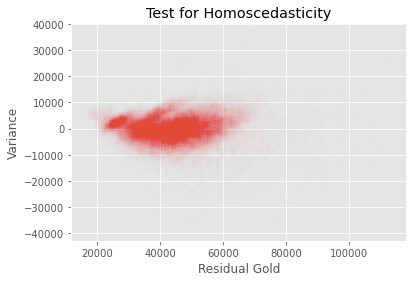

In [138]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
fig,ax = plt.subplots(1,1)
ax.scatter(y_predict,residuals, alpha=0.005)
plt.title("Test for Homoscedasticity")
ax.set_xlabel("Residual Gold")
ax.set_ylabel("Variance");

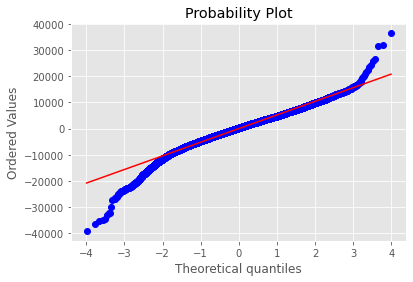

In [139]:
stats.probplot(residuals, dist="norm", plot=plt);

In [140]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")

columns = ['blueWardsPlaced','blueKills']

xtest = sm.tools.tools.add_constant(df[columns].values)
ytest = df['blueTotalGold']

yhat = results.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))
print(prediction[0:50])
print(Actual[0:50])

[28428.0, 22203.0, 24490.0, 26421.0, 33494.0, 23193.0, 24985.0, 22863.0, 24655.0, 21471.0, 22626.0, 31046.0, 24985.0, 21636.0, 21801.0, 21235.0, 27015.0, 25525.0, 23688.0, 22038.0, 27911.0, 21471.0, 22131.0, 32196.0, 26564.0, 22131.0, 25882.0, 25150.0, 40237.0, 21400.0, 27438.0, 23028.0, 23099.0, 22698.0, 27719.0, 22390.0, 19513.0, 23523.0, 23830.0, 21400.0, 23946.0, 30645.0, 26778.0, 22203.0, 21400.0, 23402.0, 27911.0, 26047.0, 20008.0, 22863.0]
[17210 14712 16113 15157 16400 15899 16874 15305 16401 15057 15474 16695
 17865 14979 15722 15015 19733 14852 16282 14994 18606 15878 15773 15906
 16515 15415 17178 17226 17474 14905 18132 16053 16438 15634 16085 14981
 15421 15665 17528 15032 15483 19226 16945 15000 15888 12925 19250 18355
 13978 15851]


In [162]:
columns = ['blueWardPlaced','blueKills']

Xtrain = sm.tools.tools.add_constant(chall_df_clean[columns].values) 
ytrain = chall_df_clean[['blueWins']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.537026
         Iterations 6


In [163]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                20924
Model:                          Logit   Df Residuals:                    20921
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.2252
Time:                        13:23:46   Log-Likelihood:                -11237.
converged:                       True   LL-Null:                       -14503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0300      0.058    -52.695      0.000      -3.143      -2.917
x1             0.0103      0.001     14.263      0.000       0.009       0.012
x2             0.1145      0.002     63.754      0.000       0.111       0.118
==============================================================================
"""

In [164]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")
log_reg.summary()
columns = ['blueWardsPlaced','blueKills']

xtest = sm.tools.tools.add_constant(df[columns].values)
ytest = df['blueWins']

yhat = log_reg.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))

In [167]:
print(np.sum(prediction))
print(Actual[0:50])

2.0
[0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 0]


In [146]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(ytest, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(ytest, prediction))


Confusion Matrix : 
 [[4949    0]
 [4928    2]]
Test accuracy =  0.5011640854337484


In [252]:
hyp_test_df = chall_df_clean[(chall_df_clean['blueFirstDragon'] > 0) & (chall_df_clean['blueFirstTower'] == 0)]
hyp_test_df2 = chall_df_clean[(chall_df_clean['blueFirstTower'] > 0) & (chall_df_clean['blueFirstDragon'] == 0)]
drag_total = len(hyp_test_df)
tow_total = len(hyp_test_df2)
drag_sample_freq = np.sum(hyp_test_df['blueWins'])/drag_total
print(f"First dragon win frequency: {drag_sample_freq:2.2f}")
tow_sample_freq = np.sum(hyp_test_df2['blueWins'])/tow_total
print(f"First tower win frequency: {tow_sample_freq:2.2f}")
print(f"First Dragon win frequency: {drag_sample_freq}, First Tower win frequency: {tow_sample_freq}")
difference_in_sample_proportions = tow_sample_freq - drag_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

First dragon win frequency: 0.36
First tower win frequency: 0.66
First Dragon win frequency: 0.35625664657922723, First Tower win frequency: 0.6557166452560103
Difference in sample proportions: 0.30


In [242]:
total = drag_total + tow_total
shared_sample_freq = (np.sum(hyp_test_df['blueWins']) + np.sum(hyp_test_df2['blueWins'])) / total
print(f'Estimated combined frequency: {shared_sample_freq}')
shared_sample_variance = total * (shared_sample_freq * (1 - shared_sample_freq)) / (drag_total * tow_total)
print(shared_sample_variance)
difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Estimated combined frequency: 0.5535671100362757
0.00013295726628933927


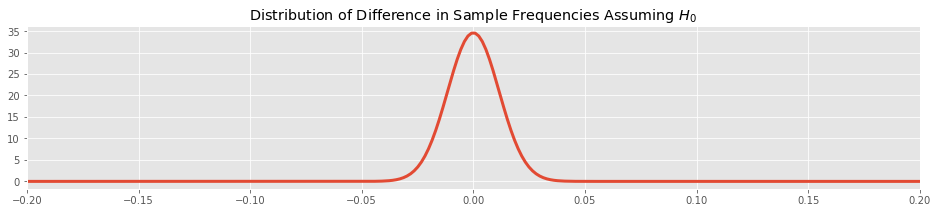

In [243]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.2, .2, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-.2, .2)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$");

0.01896632967876343


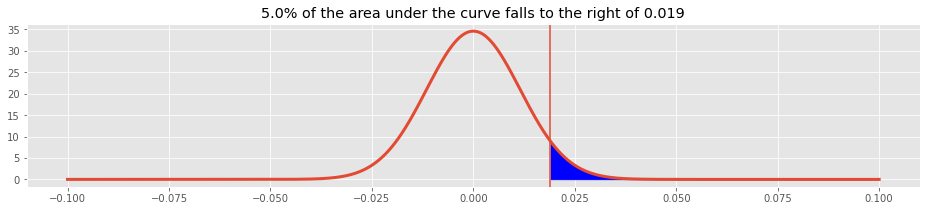

In [244]:
𝛼 = 0.05
x = np.linspace(-.1, .1, num=2500)
threshold = difference_in_proportions.ppf(1-𝛼)
print(threshold)

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.axvline(threshold)
ax.fill_between(x, 0, difference_in_proportions.pdf(x), x>threshold, color = 'blue')
ax.set_title(f'{100*𝛼}% of the area under the curve falls to the right of {round(threshold,3)}');

In [245]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for kickfip frequency comparison: {:2.3f}".format(p_value))

p-value for kickfip frequency comparison: 0.000


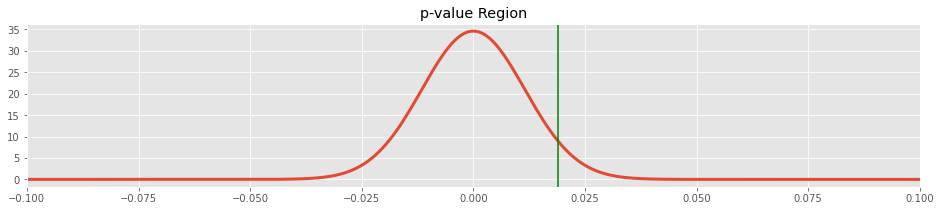

In [246]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.1, .1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.axvline(threshold, color = 'green')
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-.1, .1)
ax.set_title("p-value Region");

In [247]:
import statsmodels.stats.api as sms

X2 = hyp_test_df['blueWins']
X1 = hyp_test_df2['blueWins']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print(cm)
print(cm.tconfint_diff(alternative='larger',usevar='unequal'))

(0.281232282285465, inf)


In [248]:
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.2995,0.011,27.096,0.000,0.278,0.321


In [255]:
hyp_test_df = gm_df_clean[(gm_df_clean['blueFirstDragon'] > 0) & (gm_df_clean['blueFirstTower'] == 0)]
hyp_test_df2 = gm_df_clean[(gm_df_clean['blueFirstTower'] > 0) & (gm_df_clean['blueFirstDragon'] == 0)]

drag_total = len(hyp_test_df)
tow_total = len(hyp_test_df2)
drag_sample_freq = np.sum(hyp_test_df['blueWins'])/drag_total
print(f"First dragon win frequency: {drag_sample_freq:2.2f}")
tow_sample_freq = np.sum(hyp_test_df2['blueWins'])/tow_total
print(f"First tower win frequency: {tow_sample_freq:2.2f}")
print(f"First Dragon win frequency: {drag_sample_freq}, First Tower win frequency: {tow_sample_freq}")
difference_in_sample_proportions = tow_sample_freq - drag_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

First dragon win frequency: 0.35
First tower win frequency: 0.66
First Dragon win frequency: 0.34559477899733015, First Tower win frequency: 0.6632116569025086
Difference in sample proportions: 0.32


In [256]:
hyp_test_df = m_df_clean[(m_df_clean['blueFirstDragon'] > 0) & (m_df_clean['blueFirstTower'] == 0)]
hyp_test_df2 = m_df_clean[(m_df_clean['blueFirstTower'] > 0) & (m_df_clean['blueFirstDragon'] == 0)]

drag_total = len(hyp_test_df)
tow_total = len(hyp_test_df2)
drag_sample_freq = np.sum(hyp_test_df['blueWins'])/drag_total
print(f"First dragon win frequency: {drag_sample_freq:2.2f}")
tow_sample_freq = np.sum(hyp_test_df2['blueWins'])/tow_total
print(f"First tower win frequency: {tow_sample_freq:2.2f}")
print(f"First Dragon win frequency: {drag_sample_freq}, First Tower win frequency: {tow_sample_freq}")
difference_in_sample_proportions = tow_sample_freq - drag_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

First dragon win frequency: 0.34
First tower win frequency: 0.67
First Dragon win frequency: 0.33789579341180764, First Tower win frequency: 0.6681529924692826
Difference in sample proportions: 0.33
